In [30]:
import os
from pandas import concat, Series
from project.model import get_config, config2inputs, initialize
from project.utils import make_plot, make_grouped_subplots

In [3]:
path = 'output/static'
if not os.path.isdir(path):
    os.mkdir(path)

Loading inputs

In [4]:
config = get_config()
inputs, stock, year, policies_heater, policies_insulation, taxes = config2inputs(config)

In [5]:
buildings, energy_prices, taxes, post_inputs, cost_heater, ms_heater, cost_insulation, ms_intensive, renovation_rate_ini, policies_heater, policies_insulation, flow_built = initialize(inputs, stock, year, policies_heater, policies_insulation, taxes, config, path)

2022-09-12 10:49:11,731 - 83173 - log_static - INFO - Creating AgentBuildings object


Analysis

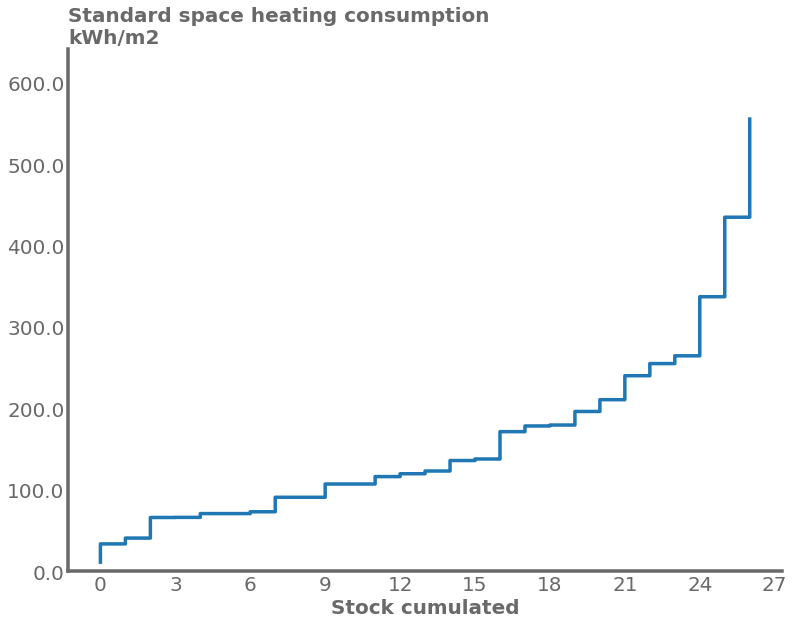

In [25]:
df = concat((buildings.stock, buildings.heating_consumption_sd()), axis=1)
df.sort_values('Consumption', inplace=True)
df['Stock cumulated'] = df['Stock buildings'].cumsum() / 10**6
df = df.set_index('Stock cumulated')['Consumption']
make_plot(df, y_label = 'Standard space heating consumption (kWh/m2)', legend=False)

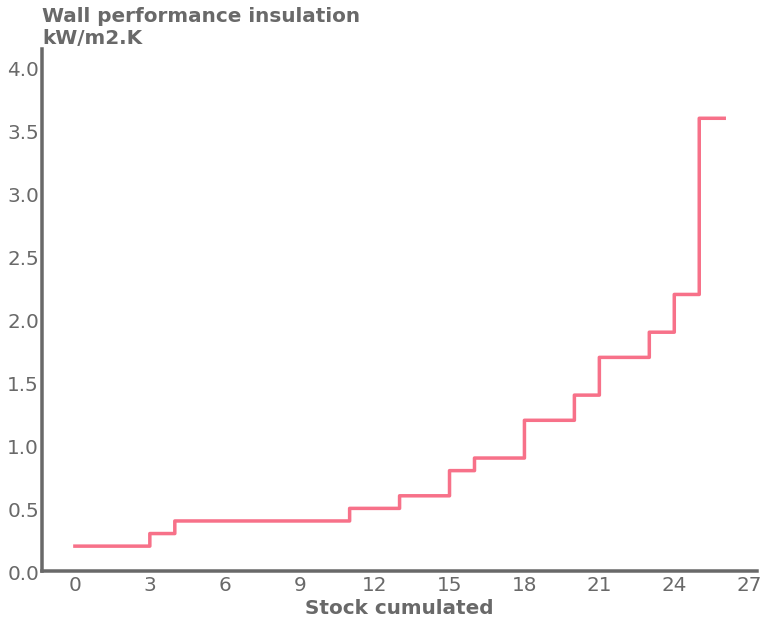

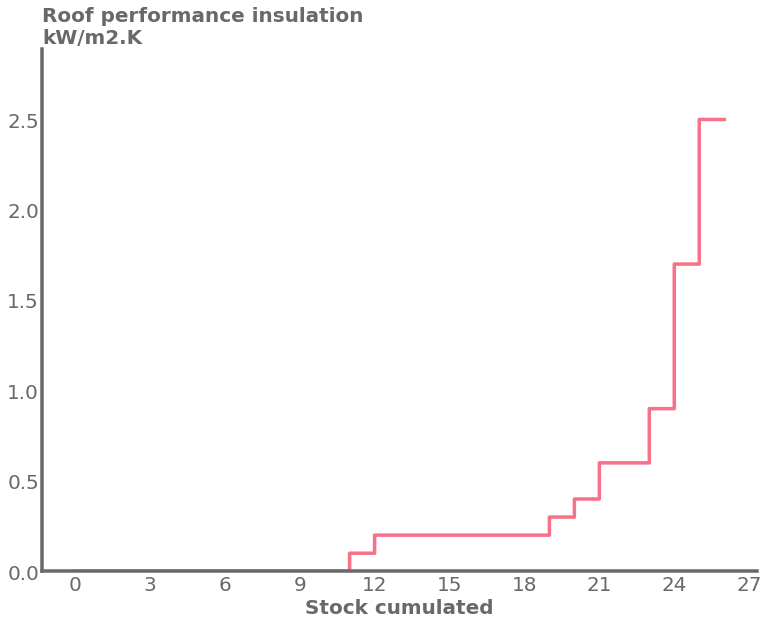

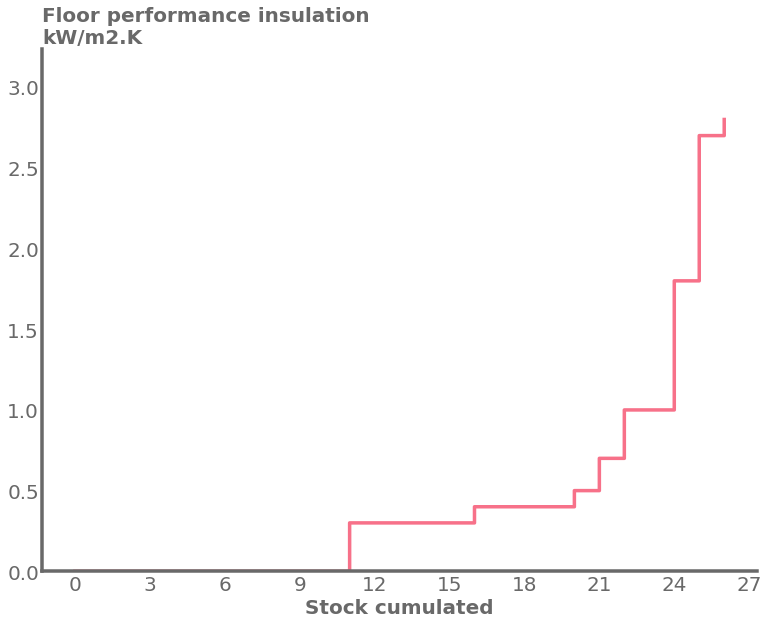

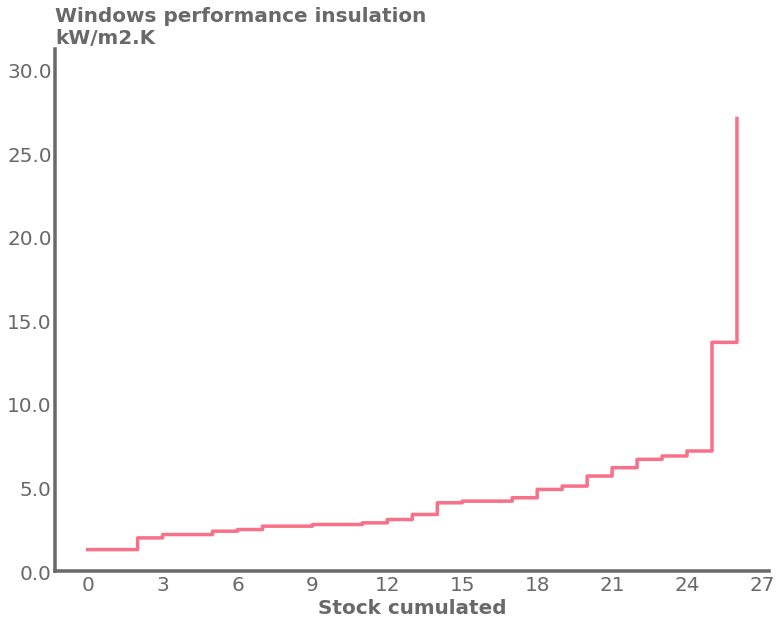

In [34]:
rslt = dict()
for i in ['Wall', 'Roof', 'Floor', 'Windows']:
    name = 'Performance {}'.format(i.lower())
    df = concat((buildings.stock, Series(buildings.stock.index.get_level_values(i), index=buildings.stock.index, name=name)), axis=1)
    df.sort_values(name, inplace=True)
    df['Stock cumulated'] = df['Stock buildings'].cumsum() / 10**6
    df = df.set_index('Stock cumulated')[name]
    rslt['{} performance insulation (kW/m2.K)'.format(i)] = df
    make_plot(df, y_label = '{} performance insulation (kW/m2.K)'.format(i), legend=False)

{'Wall performance insulation (kW/m2.K)': Stock cumulated
 0.002225     0.2
 0.002298     0.2
 0.002568     0.2
 0.002847     0.2
 0.002857     0.2
             ... 
 26.138732    3.6
 26.143812    3.6
 26.143812    3.6
 26.143812    3.6
 26.147807    3.6
 Name: Performance wall, Length: 9720, dtype: float64,
 'Roof performance insulation (kW/m2.K)': Stock cumulated
 0.002225     0.0
 0.002225     0.0
 0.002894     0.0
 0.002983     0.0
 0.004718     0.0
             ... 
 26.147518    2.5
 26.147568    2.5
 26.147639    2.5
 26.147742    2.5
 26.147807    2.5
 Name: Performance roof, Length: 9720, dtype: float64,
 'Floor performance insulation (kW/m2.K)': Stock cumulated
 0.002225     0.0
 0.002225     0.0
 0.002894     0.0
 0.002983     0.0
 0.004718     0.0
             ... 
 26.147629    2.8
 26.147641    2.8
 26.147727    2.8
 26.147780    2.8
 26.147807    2.8
 Name: Performance floor, Length: 9720, dtype: float64,
 'Windows performance insulation (kW/m2.K)': Stock cumulated
 0.0

In [ ]:
make_plot(df, y_label = 'Stock cumulated (Thousand)')

In [ ]:
df = buildings.certificate
df

In [ ]:
buildings.heat_consumption_calib